# 가설 3: 코로나 이후 온라인 교육으로 인해 학생들의 학습 이해도가 떨어져서 사교육 비중이 증가했다?

- 활용 데이터 : 원격수업 여부․효과성 여부 및 비효율적인 이유 (주된응답, 18세 이하 인구)<br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSCV061R&vw_cd=MT_ZTITLE&list_id=B_7_D220&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

- 추가적으로 해야할 사항
1. 20~21년 학업성취도와 이전 학업성취도와의 비교(20년을 기준점으로 함) => pointplot
2. 기준년도, 물가, 사교육비와 학업성취도, 학업이탈 간의 상관관계 => heatmap
3. 온라인 교육이 학업 성취도에 악영향을 줬다는 확실한 근거 데이터 조사

=> EDA 결과, **성별로 나눠서 분석하는건 의미 없을 것 같다.**

## 로우 데이터 처리

- df_online : 성별로 조사항목 비율과 항목 응답의 총계

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
from glob import glob

glob("dataset/원격수업*.csv")

['dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv']

In [4]:
# 데이터 로드
raw = pd.read_csv("dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv", encoding="cp949")
raw.shape

(15, 18)

In [5]:
# 대분류 제거
col = raw.iloc[0,:].str.strip()
raw.columns = col
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
1,전국,2021,계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
3,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
4,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
5,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
6,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
7,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
8,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
9,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2


In [6]:
# 계, 중복행 제거
raw = raw.drop([0,1]).reset_index(drop=True)
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,- 원격수업 - 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,- 원격수업 - 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,? 학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,? 나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,? 수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"? 수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"? 실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,? 선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,? 학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [7]:
# "항목" 칼럼에서 필요없는 문자열 및 좌우 공백 제거
raw["항목"] = raw["항목"].str.replace("[-?]", "", regex=True).str.strip()
raw

,행정구역별(1),시점,항목,계,동부,읍면부,남자,여자,만족,보통,불만족,100만원 미만,100∼200만원 미만,200∼300만원 미만,300∼400만원 미만,400∼500만원 미만,500∼600만원 미만,600만원 이상
0,전국,2021,원격수업함,92.0,91.9,92.6,93.3,90.5,92.7,91.7,90.3,83.2,87.7,90.2,92.0,93.0,94.8,92.8
1,전국,2021,원격수업 효과적이었음,39.3,40.3,33.8,41.9,36.5,44.7,33.7,33.9,23.9,39.4,33.0,39.4,38.6,40.8,43.9
2,전국,2021,원격수업 효과적이지 않았음,60.7,59.7,66.2,58.1,63.5,55.3,66.3,66.1,76.1,60.6,67.0,60.6,61.4,59.2,56.1
3,전국,2021,학교의 원격 수업 환경이 미비,20.9,20.7,21.9,21.8,19.9,22.5,21.2,15.4,14.3,24.8,19.1,24.6,18.0,23.0,19.8
4,전국,2021,나의 원격수업 환경이 미비,6.3,6.0,7.6,6.6,6.0,4.9,6.3,10.1,16.8,11.3,13.0,3.8,3.7,3.9,4.3
5,전국,2021,수업내용이나 구성이 미흡,19.0,19.2,17.8,20.7,17.2,16.0,23.2,17.6,12.3,14.8,20.7,13.8,20.6,22.4,20.5
6,전국,2021,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,5.6,8.0,6.0,5.9,8.1,4.5,3.3,11.9,6.8,2.6,9.6,6.1,7.8,3.3
7,전국,2021,"실험, 실습, 대면지도 등이 어려우므로",13.4,13.4,13.6,12.4,14.4,14.1,12.4,13.4,8.7,12.5,16.7,10.8,14.8,11.5,14.2
8,전국,2021,선생님의 지도 없이 학습하기 어려우므로,9.5,9.1,11.7,10.3,8.7,7.9,11.2,10.2,7.4,9.4,8.7,10.2,12.7,11.6,6.3
9,전국,2021,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,18.8,15.3,15.4,21.0,20.4,14.8,19.8,26.7,13.5,12.3,22.7,16.3,15.7,21.5


In [8]:
col

행정구역별(1)         행정구역별(1)
시점                     시점
항목                     항목
전체                      계
동·읍면부                  동부
동·읍면부.1               읍면부
성별                     남자
성별.1                   여자
주관적 만족감                만족
주관적 만족감.1              보통
주관적 만족감.2             불만족
가구소득             100만원 미만
가구소득.1       100∼200만원 미만
가구소득.2       200∼300만원 미만
가구소득.3       300∼400만원 미만
가구소득.4       400∼500만원 미만
가구소득.5       500∼600만원 미만
가구소득.6           600만원 이상
Name: 0, dtype: object

In [9]:
# 필요한 칼럼만 행으로 melt
df_online = pd.melt(raw, id_vars=["항목","계"], value_vars=col[6:8], var_name="성별", value_name="비율")
df_online

,항목,계,성별,비율
0,원격수업함,92.0,남자,93.3
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4


In [10]:
# numeric 형변환
df_online["계"] = pd.to_numeric(df_online["계"], errors="coerce")
df_online["비율"] = pd.to_numeric(df_online["비율"], errors="coerce")
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   항목      26 non-null     object 
 1   계       24 non-null     float64
 2   성별      26 non-null     object 
 3   비율      24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


## 온라인 학습 경험 비율
- 2021년 초,중,고등학생 온라인 학습 경험이 92%로 나타남
- 해당 시기의 학업성취도에 영향을 미쳤다고 가정할 수 있음 ?
<br><br>
- df_online_per : df_online에서 가공. 전체 온라인 학습 경험 비율

In [11]:
df_online_per = df_online.loc[df_online["항목"].str.contains("원격수업함|원격수업 안함"), ["항목", "계"]]
df_online_per = df_online_per[df_online_per.duplicated()]
df_online_per

,항목,계
13,원격수업함,92.0
25,원격수업 안함,8.0


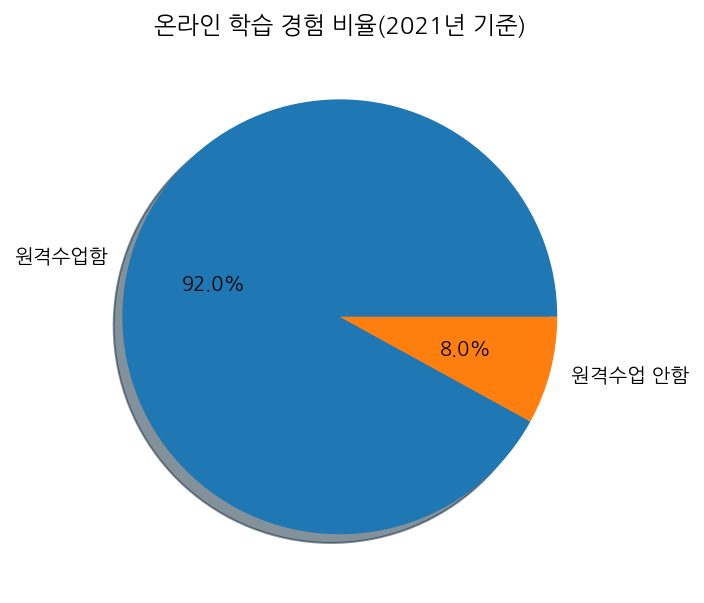

In [12]:
# 파이차트 생성
plt.figure(figsize=(18,5))
plt.pie(df_online_per["계"]
       , labels=df_online_per["항목"]
       , autopct= "%.1f%%"
       , shadow=True)
plt.title("온라인 학습 경험 비율(2021년 기준)")
plt.show()

## 온라인 교육의 효과성 판단 여부(전체, 성별)
- 온라인 교육이 효과적이지 않다고 생각하는 학생이 전체 60.7%
<br><br>
- df_effect : df_online에서 가공함. 성별 원격수업 효과성 판단 여부 항목 및 비율

In [13]:
df_effect = df_online[df_online["항목"].str.contains("원격수업  효과적이었음|원격수업  효과적이지 않았음")]
df_effect

,항목,계,성별,비율
1,원격수업 효과적이었음,39.3,남자,41.9
2,원격수업 효과적이지 않았음,60.7,남자,58.1
14,원격수업 효과적이었음,39.3,여자,36.5
15,원격수업 효과적이지 않았음,60.7,여자,63.5


In [14]:
df_effect[df_effect[["항목","계"]].duplicated()]

,항목,계,성별,비율
14,원격수업 효과적이었음,39.3,여자,36.5
15,원격수업 효과적이지 않았음,60.7,여자,63.5


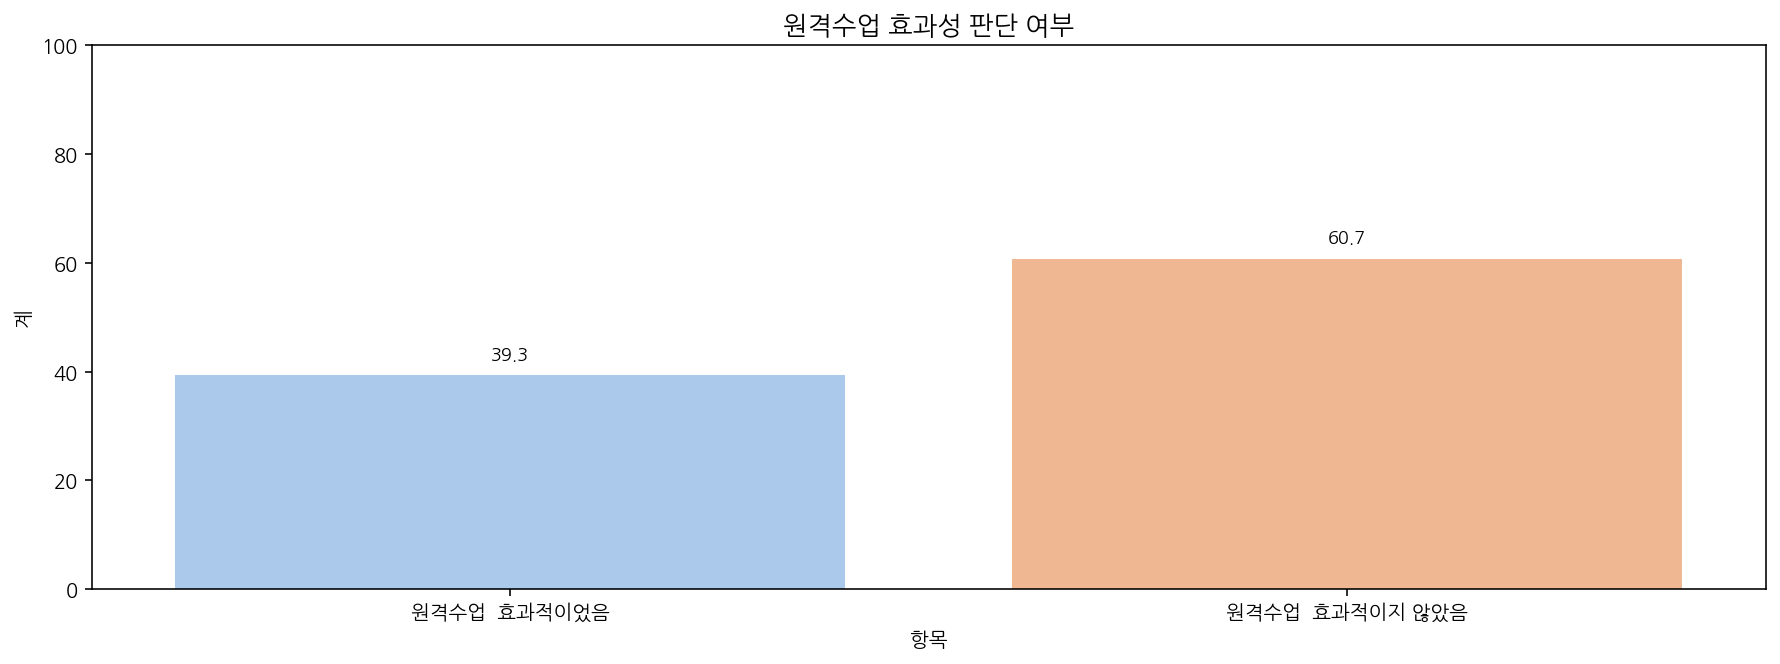

In [15]:
plt.figure(figsize=(15,5))
ef_p_a = sns.barplot(data=df_effect[df_effect[["항목","계"]].duplicated()], x="항목", y="계"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p_a.patches:
    height = p.get_height()
    ef_p_a.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)

ef_p_a.set_ylim(0, 100)
ef_p_a.set_title("원격수업 효과성 판단 여부", size=13)
plt.show()

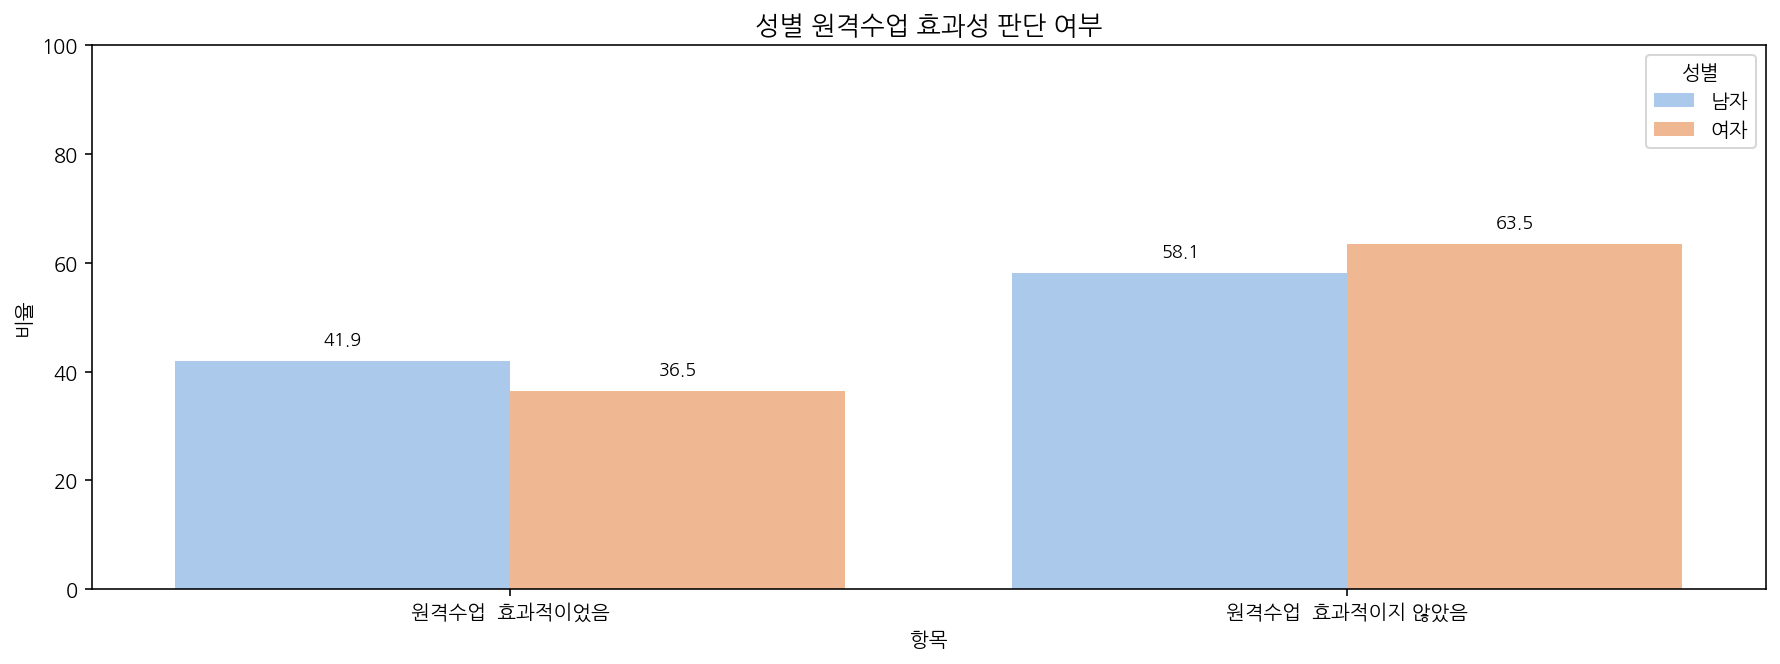

In [16]:
plt.figure(figsize=(15,5))
ef_p = sns.barplot(data=df_effect, x="항목", y="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p.patches:
    height = p.get_height()
    ef_p.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)
ef_p.set_ylim(0, 100)
ef_p.set_title("성별 원격수업 효과성 판단 여부", size=13)
plt.show()

## 원격수업이 비효율적인 이유(전체, 성별)
- 1위 : 학교 온라인 수업 인프라 문제
- 2위 : 수업 자체의 질 문제
- 3위 : 수업에 집중하기 어려움
<br><br>
- df_reason : df_online에서 가공. 원격수업이 효과적이지 않은 이유 항목 및 비율

In [17]:
df_reason = df_online[~df_online["항목"].str.contains("원격수업함|원격수업  효과적이었음|원격수업  효과적이지 않았음|기타|원격수업 안함")]
df_reason

,항목,계,성별,비율
3,학교의 원격 수업 환경이 미비,20.9,남자,21.8
4,나의 원격수업 환경이 미비,6.3,남자,6.6
5,수업내용이나 구성이 미흡,19.0,남자,20.7
6,"수업내용이 일률적, 나의 학습능력에 맞지 않음",6.0,남자,6.0
7,"실험, 실습, 대면지도 등이 어려우므로",13.4,남자,12.4
8,선생님의 지도 없이 학습하기 어려우므로,9.5,남자,10.3
9,학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로,18.2,남자,15.4
10,선생님이나 학우들과의 소통이 어려우므로,6.8,남자,6.8
16,학교의 원격 수업 환경이 미비,20.9,여자,19.9
17,나의 원격수업 환경이 미비,6.3,여자,6.0


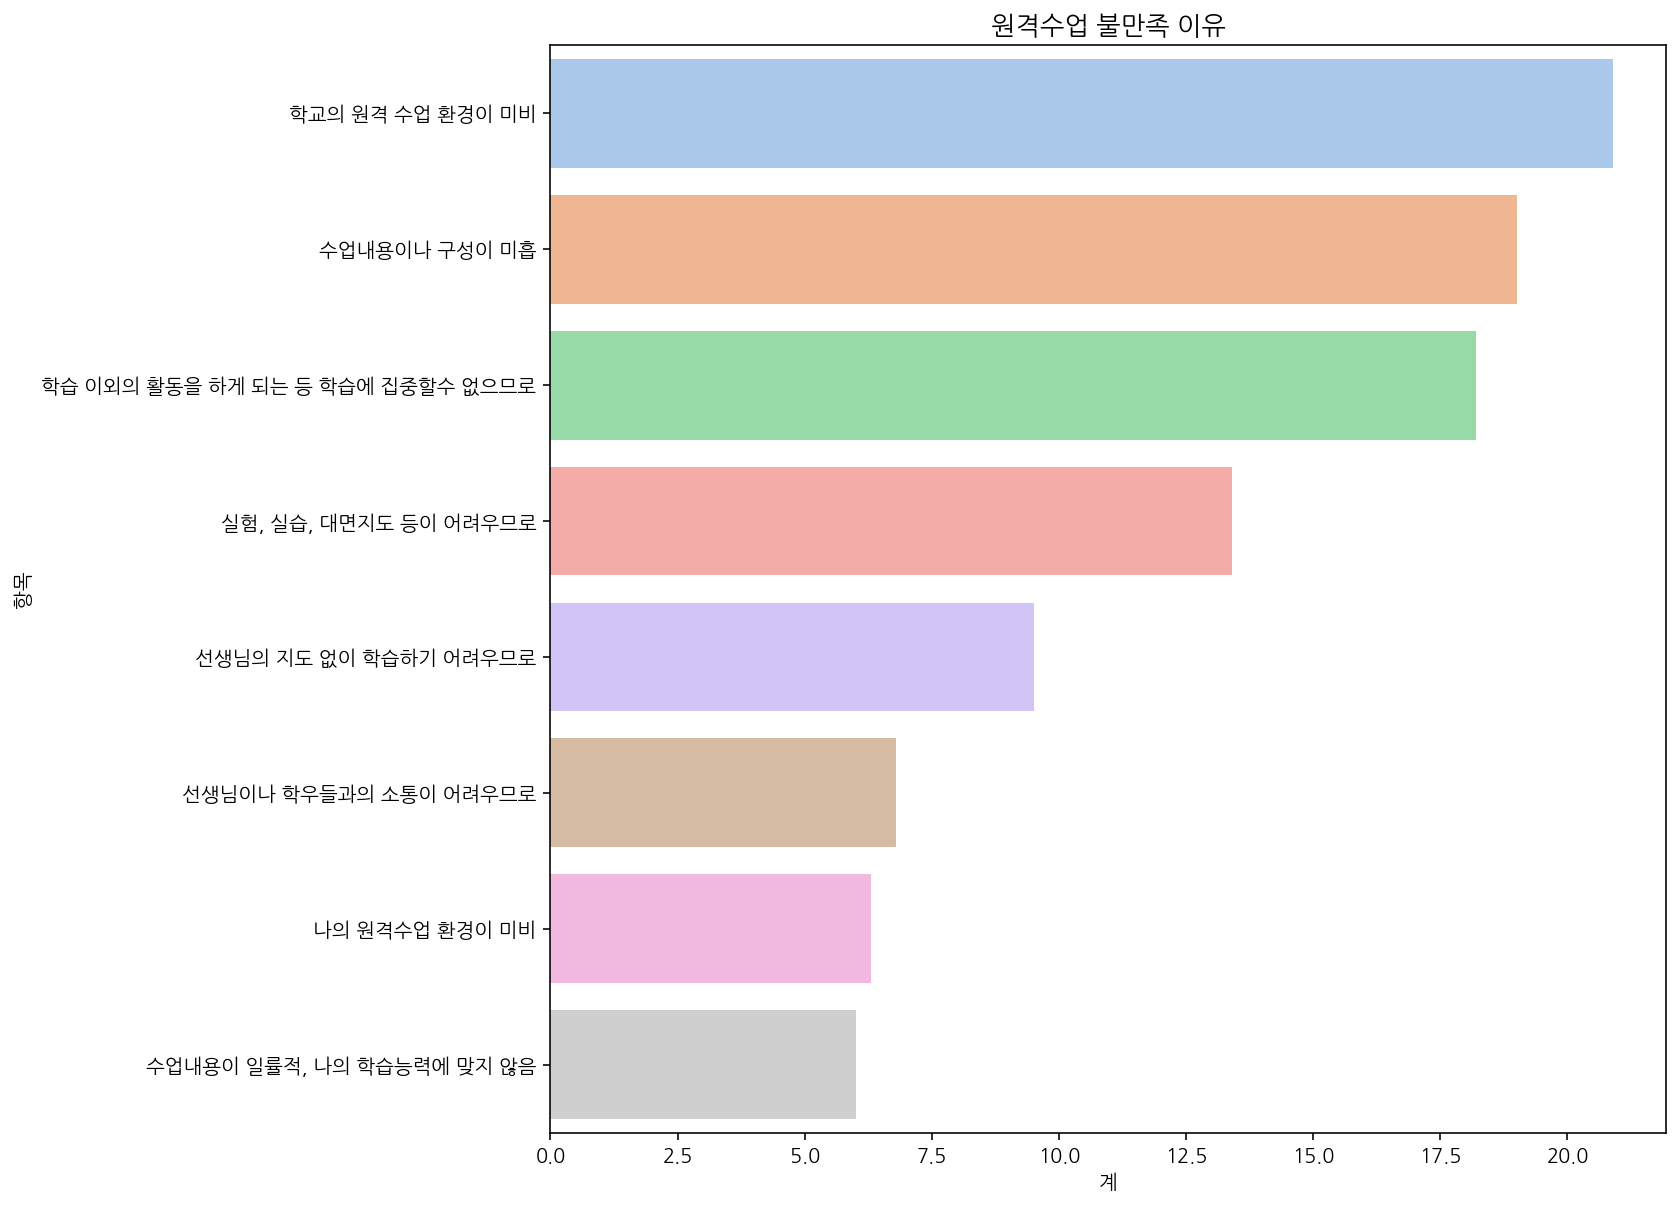

In [18]:
plt.figure(figsize=(10,10))
rs_p_a = sns.barplot(data=df_reason.sort_values(by="계",ascending=False), y="항목", x="계"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p_a.set_title("원격수업 불만족 이유", size=13)
plt.show()

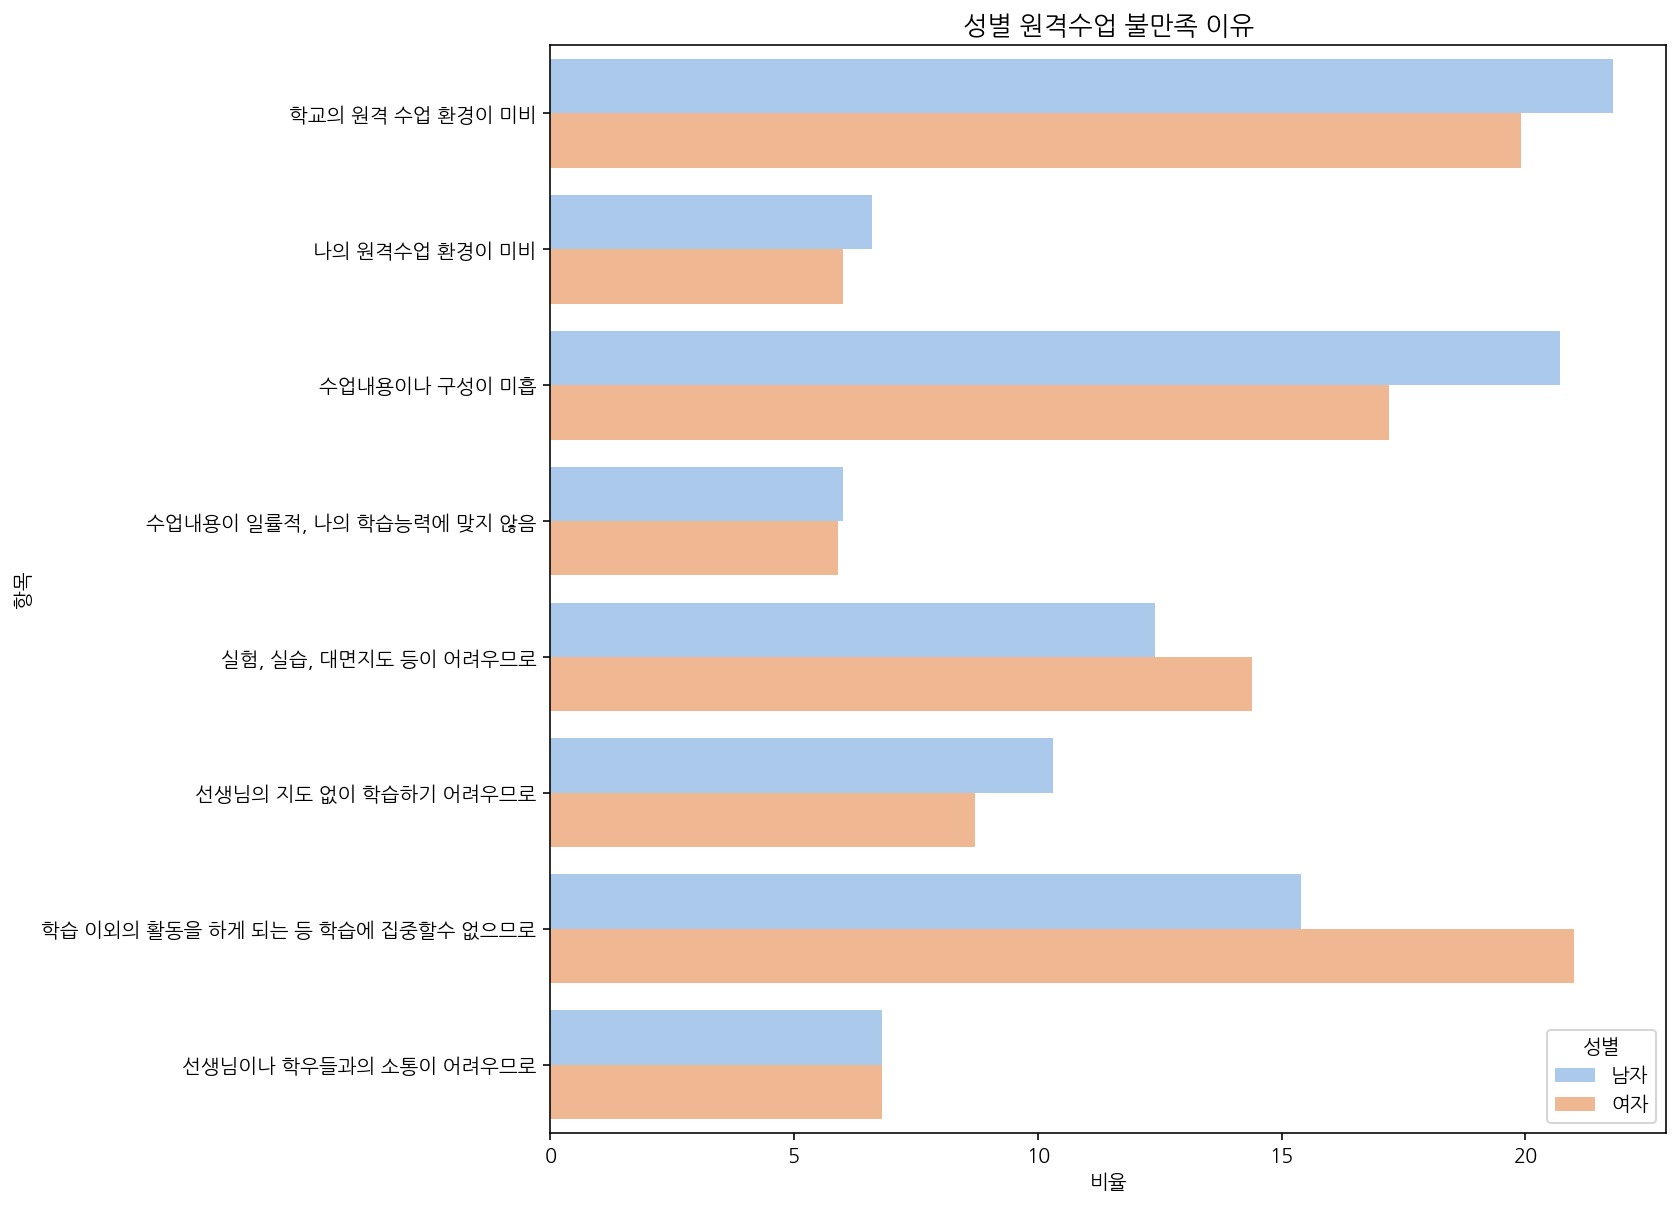

In [19]:
plt.figure(figsize=(10,10))
rs_p = sns.barplot(data=df_reason, y="항목", x="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p.set_title("성별 원격수업 불만족 이유", size=13)
plt.show()

# 사교육비 데이터

## 데이터 처리

- df_region_school_year_sum : 가설1번의 데이터셋. 지역 - 학교급에 따른 연간 사교육비 총액
- df_region_sum : 가설1번의 데이터셋. 지역별 사교육비 총액
- df_private : 전국 사교육비 총액
- df_cpi : 연도별 학원 및 보습교육 항목의 소비자물가지수

In [151]:
df_region_school_year_sum = pd.read_csv('dataset\\학교급별_사교육비_총액_20221019112918.csv', encoding='cp949')

In [152]:
df_cpi = pd.read_csv('dataset\\소비자물가지수_20110545.csv', encoding='utf-8')

In [153]:
# 로우 데이터 처리
# 연도를 행으로 melt, 항목에서 필요없는 문자 제거, 총액,연도 칼럼 numeric 변경
df_region_school_year_sum  = pd.melt(df_region_school_year_sum , id_vars = ['항목','특성별'], var_name='연도',value_name='총액')
df_region_school_year_sum['항목'] = df_region_school_year_sum['항목'].str.replace(' \(\억\원\)','',regex=True)
df_region_school_year_sum["총액"] = pd.to_numeric(df_region_school_year_sum["총액"], errors="coerce")
df_region_school_year_sum

,항목,특성별,연도,총액
0,초등학교,서울,2011,19544.0
1,초등학교,광역시,2011,19294.0
2,초등학교,중소도시,2011,39522.0
3,초등학교,읍면지역,2011,12101.0
4,초등학교,국어,2011,6337.0
...,...,...,...,...
655,일반고,"제2외국어, 한문 등",2021,319.0
656,일반고,음악,2021,2056.0
657,일반고,미술,2021,3026.0
658,일반고,체육,2021,1434.0


In [154]:
# 특성별 컬럼은 지역과 과목이 함께 들어가있어서 지역만 분리
city = ['서울','광역시','중소도시','읍면지역']
df_region_sum = df_region_school_year_sum[df_region_school_year_sum['특성별'].isin(city)]
df_region_sum

,항목,특성별,연도,총액
0,초등학교,서울,2011,19544.0
1,초등학교,광역시,2011,19294.0
2,초등학교,중소도시,2011,39522.0
3,초등학교,읍면지역,2011,12101.0
15,중학교,서울,2011,12614.0
...,...,...,...,...
633,고등학교,읍면지역,2021,5945.0
645,일반고,서울,2021,15797.0
646,일반고,광역시,2021,13999.0
647,일반고,중소도시,2021,27206.0


In [155]:
# 지역합 = 전국통계로 가정하고 groupby
df_private = df_region_sum.groupby("연도").sum().reset_index()
df_private

,연도,총액
0,2011,248908.0
1,2012,239477.0
2,2013,235005.0
3,2014,231054.0
4,2015,227058.0
5,2016,233238.0
6,2017,241513.0
7,2018,252031.0
8,2019,269353.0
9,2020,254267.0


In [156]:
# merge를 위해 df_cpi를 df_private와 같은 형태로 변환
df_cpi = df_cpi.drop(0)
df_cpi.columns = ["연도", "지수", "전년대비증감", "전년대비증감률"]
df_cpi["연도"] = df_cpi["연도"].astype(str)
df_cpi

,연도,지수,전년대비증감,전년대비증감률
1,2011,80.761,2.574,3.3
2,2012,84.319,3.558,4.4
3,2013,87.454,3.135,3.7
4,2014,89.385,1.931,2.2
5,2015,91.235,1.850,2.1
6,2016,93.285,2.050,2.2
7,2017,94.740,1.455,1.6
8,2018,96.612,1.872,2.0
9,2019,98.505,1.893,2.0
10,2020,100.000,1.495,1.5


In [157]:
df_private_cpi = df_private.merge(df_cpi)
df_private_cpi

,연도,총액,지수,전년대비증감,전년대비증감률
0,2011,248908.0,80.761,2.574,3.3
1,2012,239477.0,84.319,3.558,4.4
2,2013,235005.0,87.454,3.135,3.7
3,2014,231054.0,89.385,1.931,2.2
4,2015,227058.0,91.235,1.850,2.1
5,2016,233238.0,93.285,2.050,2.2
6,2017,241513.0,94.740,1.455,1.6
7,2018,252031.0,96.612,1.872,2.0
8,2019,269353.0,98.505,1.893,2.0
9,2020,254267.0,100.000,1.495,1.5


## 연도별 사교육비 총액 & 학원 및 보습교육 물가지수 변동 시각화
- 물가가 사교육비에 영향을 미치지 못한 것으로 판단함

In [175]:
custom_palette = sns.choose_colorbrewer_palette("diversing")

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

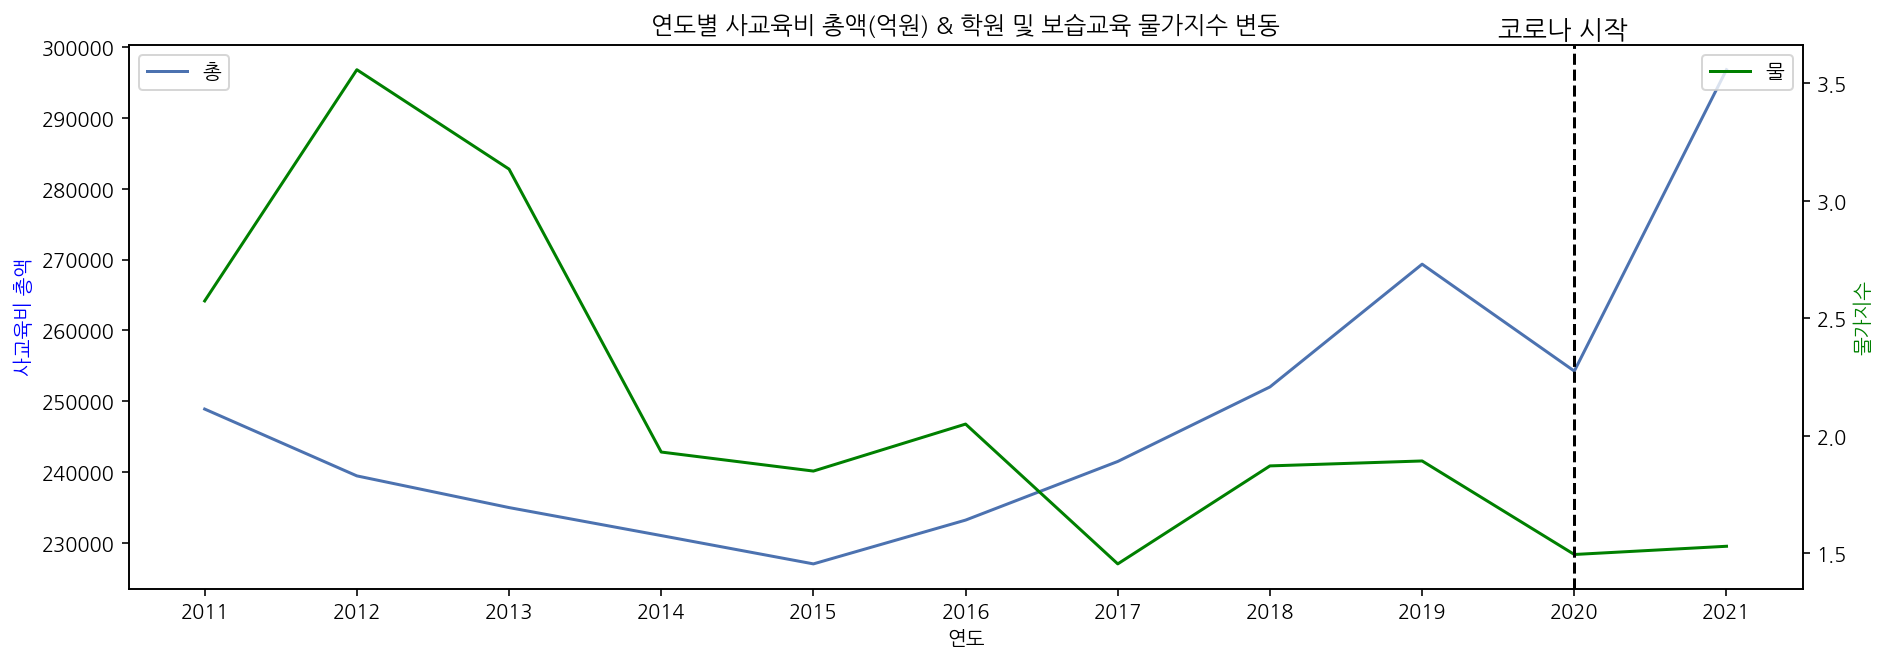

In [233]:
# 시각화
plt.figure(figsize=(15,5))

pr_p = sns.lineplot(data=df_private_cpi, x="연도", y="총액", palette="Blue", legend=False)

pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=df_private_cpi, x="연도", y="전년대비증감", color="green", legend=False)

pr_p.set_ylabel("사교육비 총액", color="Blue")
pr_c.set_ylabel("물가지수", color="Green")

pr_p.legend("총")
pr_c.legend("물")

plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 3.7, "코로나 시작", size=13)
plt.title("연도별 사교육비 총액(억원) & 학원 및 보습교육 물가지수 변동")
plt.show()

In [244]:
corr_private_cpi = df_private_cpi.loc[:, ["연도", "총액", "전년대비증감"]].corr()
corr_private_cpi

,총액,전년대비증감
총액,1.000000,-0.354425
전년대비증감,-0.354425,1.000000


# 학업 중단 데이터

## 데이터 처리

In [354]:
stop_school = pd.read_excel("./dataset/서울 학업중단율.xlsx")

In [360]:
# 21년 데이터는 따로 가져옴
stop_school_2 = pd.read_excel("dataset/2021_학업중단률 및 중단 사유.xlsx")

C:\Users\JongHyun_Moon\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [361]:
stop_school_2 = stop_school_2[(stop_school_2["시도"] == "전국")]
stop_school_2 = stop_school_2.loc[stop_school_2["학제"].str.contains("초등학교|중학교|고등학교|소계"), "학업중단자 계"].reset_index(drop=True)
stop_school_2 = list(stop_school_2)
stop_school_2.insert(0, "2021")
stop_school_2

['2021', 11612.0, 5976.0, 14439.0, 32027.0]

In [355]:
# 필요 없는 행 삭제
stop_school = stop_school.drop([0, 1, 2])
stop_school = stop_school.reset_index(drop=True)
stop_school

,시점,소계 초등학교 학생수,소계 중학교 학생수,소계 고등학교 학생수,종로구 초등학교 학생수,종로구 중학교 학생수,종로구 고등학교 학생수,중구 초등학교 학생수,중구 중학교 학생수,중구 고등학교 학생수,...,서초구 고등학교 학업중단율,강남구 초등학교 학업중단율,강남구 중학교 학업중단율,강남구 고등학교 학업중단율,송파구 초등학교 학업중단율,송파구 중학교 학업중단율,송파구 고등학교 학업중단율,강동구 초등학교 학업중단율,강동구 중학교 학업중단율,강동구 고등학교 학업중단율
0,2011,535948,330219,353632,7714,5086,14380,6948,3845,10447,...,2.3,3.52,3.05,2.33,1.55,1.53,2.05,0.83,1.03,2.22
1,2012,502000,315241,344391,7140,4878,13853,6512,3513,9914,...,2.24,2.97,2.9,2.34,1.55,1.37,1.82,0.76,0.89,2.05
2,2013,469392,304251,334123,6561,4700,13538,6066,3266,9600,...,2.27,2.96,2.58,2,1.48,1.49,1.46,0.71,0.85,1.74
3,2014,457517,286826,320398,6233,4400,13069,5854,2960,9177,...,1.87,2.61,2.33,1.76,1.48,1.26,1.42,0.6,0.91,1.45
4,2015,450675,263466,308306,6084,3935,12653,5739,2663,8933,...,1.7,1.97,2.01,1.66,1.37,1.29,1.16,0.6,0.79,1.16
5,2016,436121,239912,299556,5686,3453,12131,5474,2281,8163,...,1.91,2.19,2.22,1.7,1.36,1.14,1.31,0.58,0.57,1.25
6,2017,428333,227001,282968,5561,3168,11029,5283,2107,7866,...,2.21,2.27,2.26,1.79,1.58,1.19,1.35,0.77,0.72,1.34
7,2018,424800,216330,259554,5507,2945,10016,5226,1986,7539,...,2.18,2.74,2.46,2.16,1.47,1.22,1.73,0.75,0.89,1.33
8,2019,422293,207413,236689,5463,2854,9046,5181,1876,7058,...,2.07,3.02,2.63,2.19,1.49,1.26,1.71,0.82,0.76,1.74
9,2020,409536,207081,224316,5192,2793,8467,4990,1845,6731,...,1.41,1.23,1.53,1.28,0.91,1.01,1.05,0.5,0.52,1.12


In [356]:
# 연도를 인덱스로, 나머지 칼럼 float형 지정
stop_school = stop_school.set_index("시점")
stop_school = stop_school.astype("float")

In [362]:
# 학업 중단자수 소계만 추출
stop_school_total = stop_school.loc[:,stop_school.columns.str.contains("소계 초등학교 학업중단자수|소계 중학교 학업중단자수|소계 고등학교 학업중단자수")]
stop_school_total["학업중단자수"] = stop_school_total["소계 초등학교 학업중단자수"] + stop_school_total["소계 중학교 학업중단자수"] + stop_school_total["소계 고등학교 학업중단자수"]
stop_school_total = stop_school_total.reset_index()
stop_school_total.columns = ["연도", "학업중단자수(초)", "학업중단자수(중)", "학업중단자수(고)", "학업중단자수(합)"]
stop_school_total

C:\Users\JongHyun_Moon\AppData\Local\Temp\ipykernel_16836\2352339461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_school_total["학업중단자수"] = stop_school_total["소계 초등학교 학업중단자수"] + stop_school_total["소계 중학교 학업중단자수"] + stop_school_total["소계 고등학교 학업중단자수"]


,연도,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,6425.0,4653.0,6846.0,17924.0
1,2012,5671.0,4028.0,6427.0,16126.0
2,2013,4948.0,3561.0,5625.0,14134.0
3,2014,4696.0,2981.0,4707.0,12384.0
4,2015,4437.0,2532.0,4175.0,11144.0
5,2016,4412.0,2228.0,4310.0,10950.0
6,2017,4686.0,2329.0,4531.0,11546.0
7,2018,4792.0,2423.0,4622.0,11837.0
8,2019,5154.0,2414.0,4318.0,11886.0
9,2020,2700.0,1397.0,2321.0,6418.0


In [363]:
# 21년도 데이터 합치기
stop_school_total.loc[10] = stop_school_2
stop_school_total

,연도,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,6425.0,4653.0,6846.0,17924.0
1,2012,5671.0,4028.0,6427.0,16126.0
2,2013,4948.0,3561.0,5625.0,14134.0
3,2014,4696.0,2981.0,4707.0,12384.0
4,2015,4437.0,2532.0,4175.0,11144.0
5,2016,4412.0,2228.0,4310.0,10950.0
6,2017,4686.0,2329.0,4531.0,11546.0
7,2018,4792.0,2423.0,4622.0,11837.0
8,2019,5154.0,2414.0,4318.0,11886.0
9,2020,2700.0,1397.0,2321.0,6418.0


In [365]:
# 사교육비 데이터와 merge
df_pcs = df_private_cpi.merge(stop_school_total, on="연도")
df_pcs

,연도,총액,지수,전년대비증감,전년대비증감률,학업중단자수(초),학업중단자수(중),학업중단자수(고),학업중단자수(합)
0,2011,248908.0,80.761,2.574,3.3,6425.0,4653.0,6846.0,17924.0
1,2012,239477.0,84.319,3.558,4.4,5671.0,4028.0,6427.0,16126.0
2,2013,235005.0,87.454,3.135,3.7,4948.0,3561.0,5625.0,14134.0
3,2014,231054.0,89.385,1.931,2.2,4696.0,2981.0,4707.0,12384.0
4,2015,227058.0,91.235,1.850,2.1,4437.0,2532.0,4175.0,11144.0
5,2016,233238.0,93.285,2.050,2.2,4412.0,2228.0,4310.0,10950.0
6,2017,241513.0,94.740,1.455,1.6,4686.0,2329.0,4531.0,11546.0
7,2018,252031.0,96.612,1.872,2.0,4792.0,2423.0,4622.0,11837.0
8,2019,269353.0,98.505,1.893,2.0,5154.0,2414.0,4318.0,11886.0
9,2020,254267.0,100.000,1.495,1.5,2700.0,1397.0,2321.0,6418.0
